# LLC_Results

In [1]:
%matplotlib notebook

In [2]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io

In [3]:
os.getenv('ENDPOINT_URL')

'https://s3.nautilus.optiputer.net'

In [4]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Load table

In [16]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: s3://llc/Tables/test_uniform_r0.5_test.feather


In [17]:
llc_table.head()

,lat,lon,row,col,datetime,LLC_file,pp_file,pp_root,field_size,mean_temperature,Tmin,Tmax,T90,T10,pp_idx,pp_type,LL
0,71.725098,-177.172684,12895,10607,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-1.467546,-1.579000,-0.619,-1.351001,-1.541000,647491,0,648.981934
1,71.747978,-175.380554,12895,10676,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,-0.492408,-1.544001,3.539,3.364000,-1.540001,384768,0,-513.771851
2,71.758400,-173.559555,12895,10746,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,3.271719,1.870000,3.774,3.499000,2.540999,283882,0,345.448669
3,71.755905,-171.737854,12895,10816,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.945127,1.368000,3.452,3.375000,2.229000,613023,0,169.709839
4,71.740822,-169.943695,12895,10885,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.364319,1.440000,3.272,2.841000,1.891000,537161,0,349.981262


In [18]:
llc_table.min()

lat                                                           -78.124
lon                                                           -179.99
row                                                              1766
col                                                                 0
datetime                                          2011-09-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                             -2.20823
Tmin                                                           -2.393
Tmax                                                           -1.924
T90                                                            -1.961
T10                                                            -2.361
pp_idx              

In [15]:
imin = np.argmin(llc_table.LL)
llc_table.iloc[imin]

lat                                                          -12.0252
lon                                                          -93.1562
row                                                              7259
col                                                             14600
datetime                                          2011-09-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              19.5778
Tmin                                                           18.544
Tmax                                                           20.096
T90                                                            20.034
T10                                                            19.009
pp_idx              

# Plot

<IPython.core.display.Javascript object>


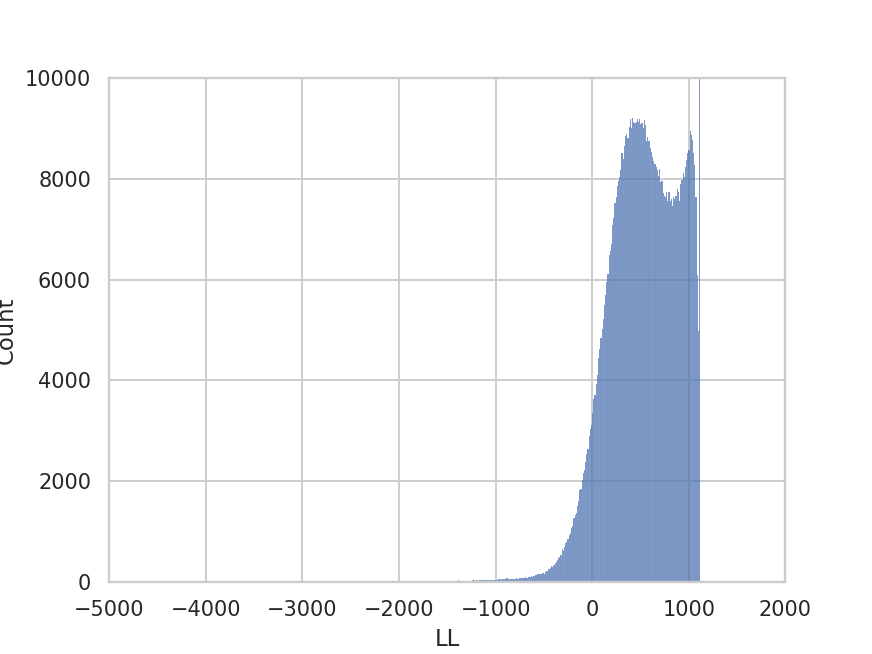

(0.0, 10000.0)

In [19]:
ax = sns.histplot(data=llc_table, x='LL')
ax.set_xlim(-5000., 2000.)
ax.set_ylim(0., 10000.)

In [20]:
ax = sns.histplot(data=llc_table[np.isfinite(llc_table.LL)], x='LL')
ax.set_xlim(-5000., -1000.)
ax.set_ylim(0., 200.)

<IPython.core.display.Javascript object>

(0.0, 200.0)

## With DT

In [11]:
llc_table.iloc[103673]

lat                                                          -42.2138
lon                                                           53.5104
row                                                              5460
col                                                              4360
datetime                                          2011-09-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              7.57307
Tmin                                                             5.07
Tmax                                                           14.835
T90                                                            11.124
T10                                                             5.551
pp_idx              

In [21]:
llc_table['DT'] = llc_table.T90 - llc_table.T10

<IPython.core.display.Javascript object>


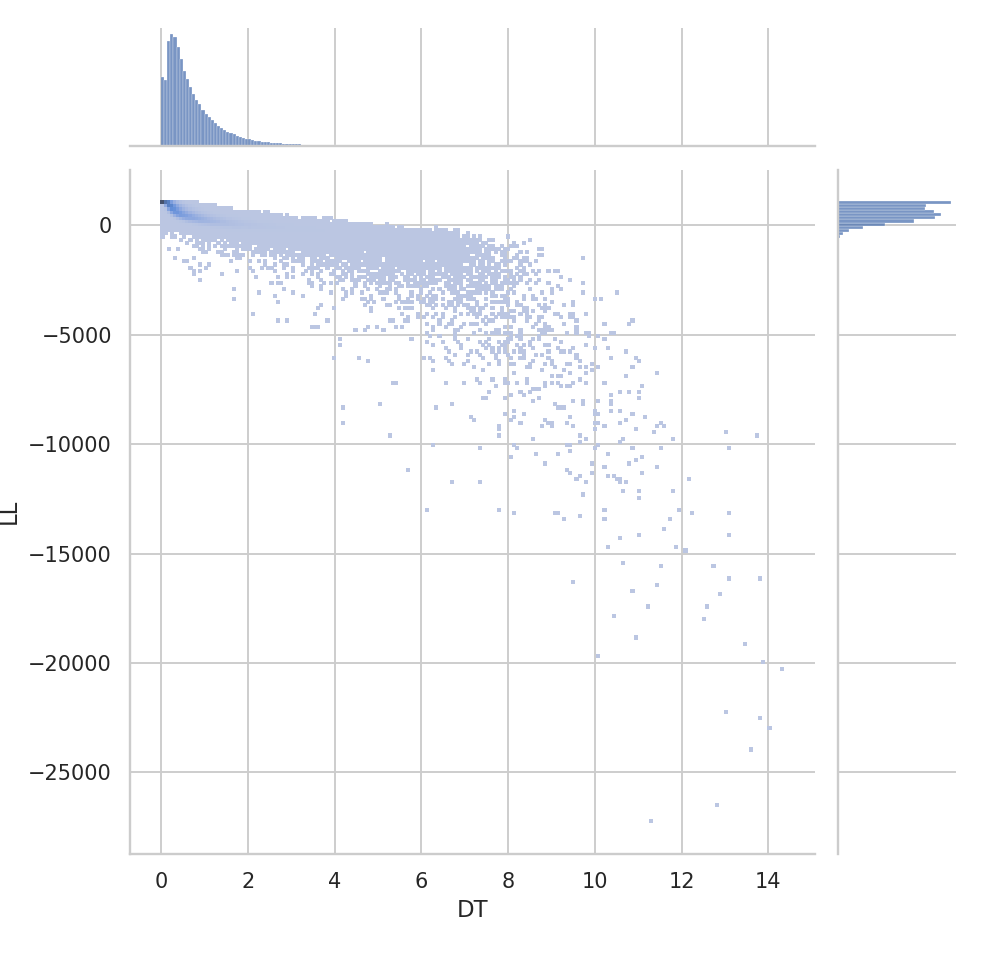

In [23]:
#fig = plt.figure(figsize=(12,12))
#ax = plt.gca()
#sns.displot(data=llc_table[np.isfinite(llc_table.LL)], x='LL', y='DT')
jg = sns.jointplot(data=llc_table, x='DT', y='LL',
    kind='hist', bins=200, marginal_kws=dict(bins=200))

# Show one

## Aim for -4000 and high $\Delta T$

In [24]:
high_DT = llc_table.DT > 4.

In [27]:
i4000 = np.argmin(np.abs(llc_table[high_DT].LL + 4000.))
cutout = llc_table[high_DT].iloc[i4000]
cutout

lat                                                           35.3249
lon                                                          -71.7188
row                                                              9856
col                                                             15629
datetime                                          2011-11-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-11-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              21.7707
Tmin                                                           16.167
Tmax                                                           25.351
T90                                                            25.071
T10                                                            16.607
pp_idx              

## PreProc

In [21]:
pp_hf.close()

In [28]:
reload(llc_io)
img, pp_hf = llc_io.grab_image(cutout, close=False)

In [29]:
img.min(), img.max()

(-5.603691, 3.5803108)

## Show

<IPython.core.display.Javascript object>


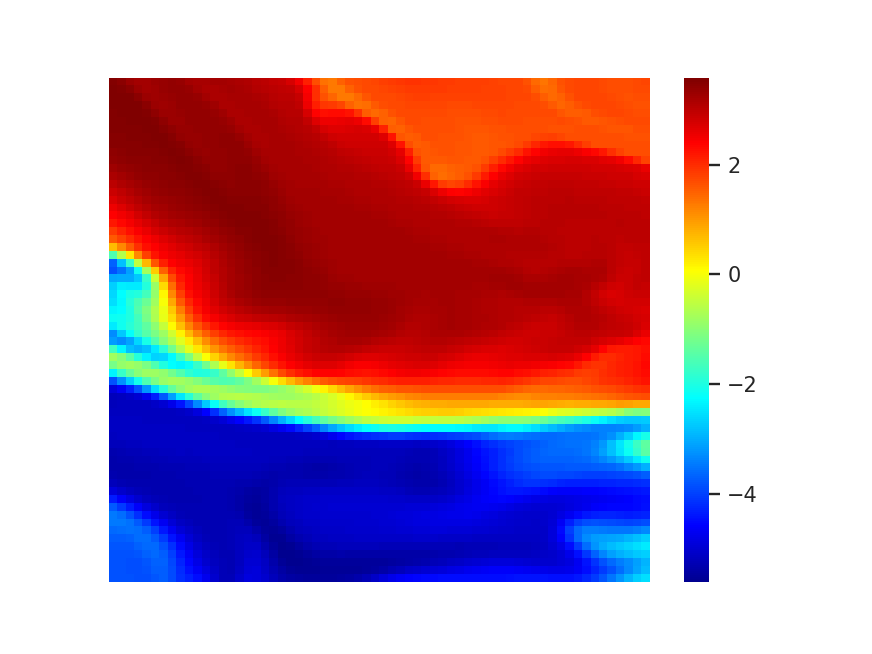

In [30]:
pal, cm = plotting.load_palette()
ax = sns.heatmap(img, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

## Now lower $\Delta T$

In [31]:
low_DT = llc_table.DT < 2.

In [32]:
i4000_low = np.argmin(np.abs(llc_table[low_DT].LL + 4000.))
llc_table[low_DT].iloc[i4000_low]

lat                                                           46.0014
lon                                                            148.76
row                                                             10587
col                                                              8932
datetime                                          2012-07-31 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2012-07-31T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              13.0478
Tmin                                                            2.798
Tmax                                                           15.061
T90                                                            14.477
T10                                                            12.814
pp_idx              

In [33]:
cutout_low = llc_table[low_DT].iloc[i4000_low]

In [34]:
img_low, _ = llc_io.grab_image(cutout_low, close=False, pp_hf=pp_hf)

<IPython.core.display.Javascript object>


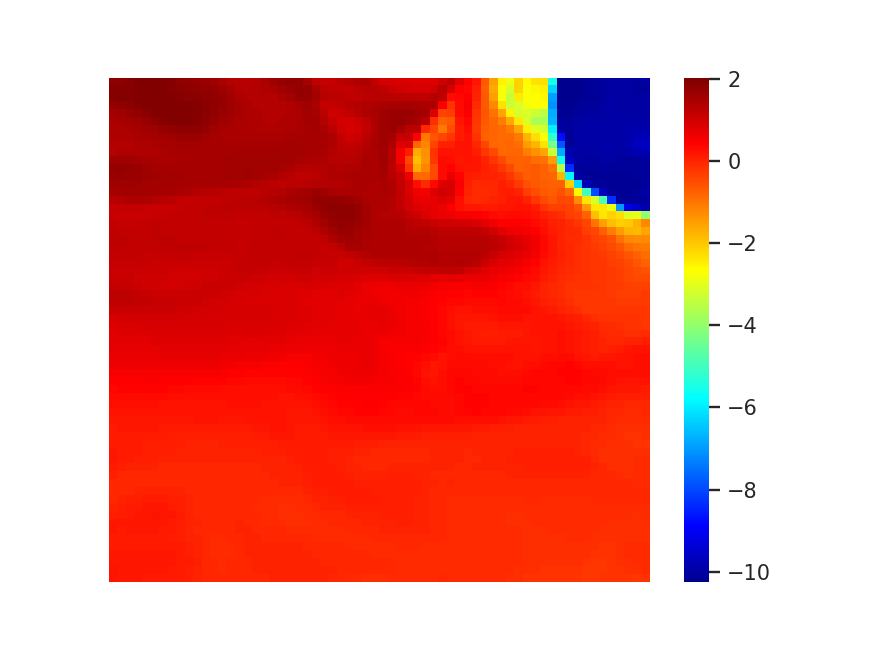

In [35]:
ax = sns.heatmap(img_low, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

# High $\Delta T$, high LL

In [37]:
i_HH = np.argmin(np.abs(llc_table[high_DT].LL - 1000.))
cutout_HH = llc_table[high_DT].iloc[i_HH]
cutout_HH

lat                                                           12.9438
lon                                                          -94.9271
row                                                              8565
col                                                             14515
datetime                                          2011-11-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-11-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              24.1362
Tmin                                                           21.069
Tmax                                                            26.61
T90                                                            25.776
T10                                                            21.682
pp_idx              

<IPython.core.display.Javascript object>


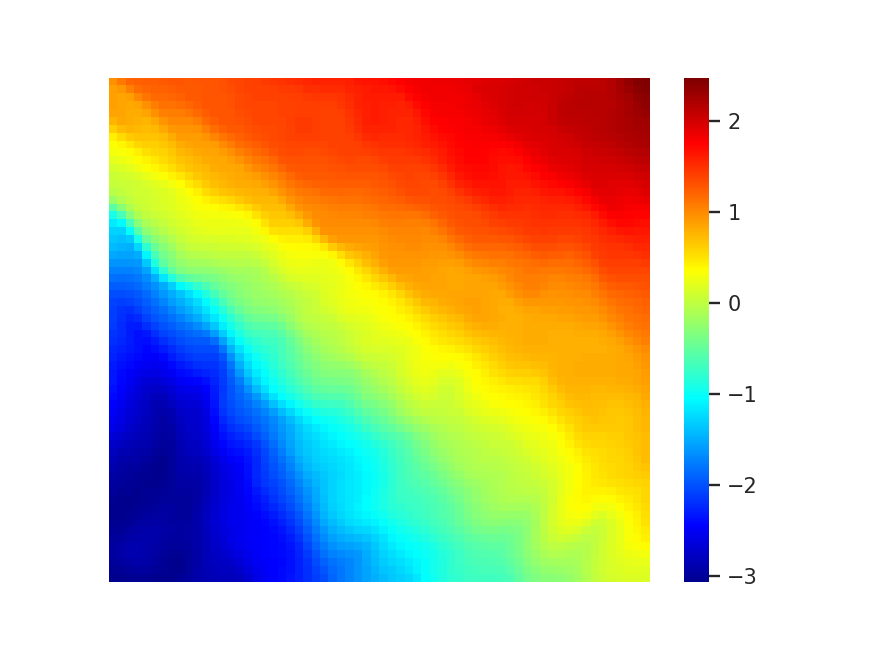

In [38]:
img_HH, _ = llc_io.grab_image(cutout_HH, close=False, pp_hf=pp_hf)
ax = sns.heatmap(img_HH, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

# Low $\Delta T$, high LL

In [39]:
i_HL = np.argmin(np.abs(llc_table[low_DT].LL - 1000.))
cutout_HL = llc_table[low_DT].iloc[i_HL]
cutout_HL

lat                                                          -7.47858
lon                                                           -138.51
row                                                              7499
col                                                             12423
datetime                                          2011-09-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                               25.846
Tmin                                                           25.651
Tmax                                                           25.958
T90                                                            25.924
T10                                                            25.776
pp_idx              

<IPython.core.display.Javascript object>


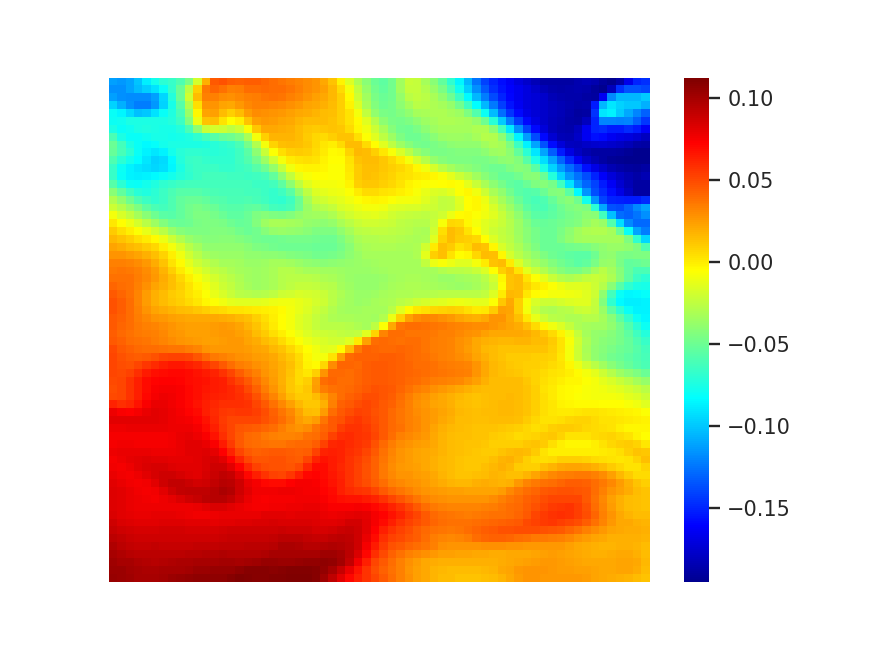

In [40]:
img_HL, _ = llc_io.grab_image(cutout_HL, close=False, pp_hf=pp_hf)
ax = sns.heatmap(img_HL, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

In [39]:
cutout_HL

lat                                                          -34.2362
lon                                                          -104.406
row                                                              5988
col                                                             14060
datetime                                          2011-11-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-11-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              16.9455
Tmin                                                           16.213
Tmax                                                           17.379
T90                                                            17.194
T10                                                            16.686
pp_idx              

----

# Debugin

In [86]:
pp_file = 's3://llc/PreProc/LLC_uniform_test_preproc.h5'

In [87]:
pp_hf.close()

In [88]:
f=ulmo_io.open(pp_file, 'rb')
pp_hf = h5py.File(f, 'r')

In [100]:
img3 = pp_hf['valid'][189772, 0, ...]

<AxesSubplot:>

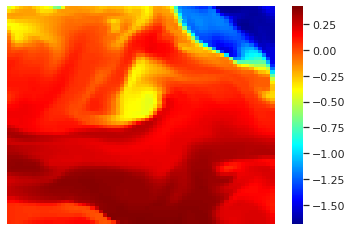

In [101]:
pal, cm = plotting.load_palette()
sns.heatmap(img3, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

In [29]:
i4000

219001

## Local

In [30]:
pp_file_local = '/data/Projects/Oceanography/AI/OOD/LLC/PreProc/LLC_uniform_preproc_test.h5'

In [33]:
with ulmo_io.open(pp_file_local, 'rb') as f:
    pp_hf_l = h5py.File(f, 'r')
    img_l = pp_hf_l['valid'][i4000, 0, ...]

<AxesSubplot:>

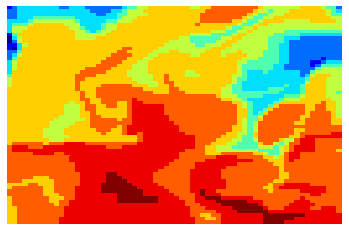

In [34]:
pal, cm = plotting.load_palette()
sns.heatmap(img_l, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=False)

## Correct answer

In [54]:
sdate = str(cutout.datetime).replace(':','_')[:19]
sdate

'2011-11-30 00_00_00'

In [58]:
sdate[10] = 'T'

TypeError: 'str' object does not support item assignment

In [62]:
reload(llc_io)
dfile = llc_io.grab_llc_datafile(cutout.datetime, local=True)
dfile

'/data/Projects/Oceanography/data/LLC/ThetaUVSalt/LLC4320_2011-11-30T00_00_00.nc'

In [65]:
ds = xarray.open_dataset(dfile)
ds

<xarray.Dataset>
Dimensions:  (i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_l: 1)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
Dimensions without coordinates: k_l
Data variables:
    Theta    (j, i) float32 ...
    U        (j, i_g) float32 ...
    V        (j_g, i) float32 ...
    W        (k_l, j, i) float32 ...
    Salt     (j, i) float32 ...

In [66]:
sst = ds.Theta.values

In [69]:
sst.shape

(12960, 17280)

In [70]:
cutout

lat                                                          -29.9971
lon                                                           74.8854
row                                                              6249
col                                                              5386
datetime                                          2011-11-30 00:00:00
LLC_file            s3://llc/ThetaUVSalt/LLC4320_2011-11-30T00_00_...
pp_file                  s3://llc/PreProc/LLC_uniform_test_preproc.h5
pp_root                                                       llc_std
field_size                                                         64
mean_temperature                                              20.5525
Tmin                                                           19.154
Tmax                                                           21.679
T90                                                            21.185
T10                                                            19.829
Name: 219001, dtype:

In [67]:
img7 = sst[cutout.row:cutout.row+64, cutout.col:cutout.col+64]
img7.shape

(64, 64)

<AxesSubplot:>

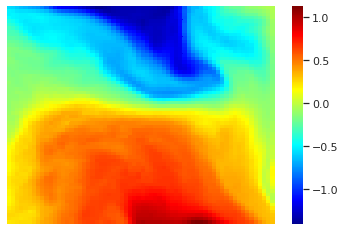

In [72]:
pal, cm = plotting.load_palette()
sns.heatmap(img7-np.mean(img7), xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)

## Local Preproc

In [73]:
local_pp = '/data/Projects/Oceanography/AI/OOD/LLC/PreProc/LLC_uniform_test_preproc.h5'

In [74]:
lpp_h5 = h5py.File(local_pp, 'r')

In [75]:
lpp_h5.keys()

<KeysViewHDF5 ['valid', 'valid_metadata']>

In [78]:
meta = lpp_h5['valid_metadata']
df_pp = pandas.DataFrame(meta[:].astype(np.unicode_))#, columns=meta.attrs['columns'])

In [79]:
df_pp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.515810012817383,-49.92708206176758,8867,16675,2012-07-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-07-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,26.77527618408203,26.400001525878906,26.970001220703125,26.916000366210938,26.483001708984375
1,-39.73479461669922,178.2395782470703,5630,10347,2011-09-30 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,12.325772285461426,11.689000129699707,12.921000480651855,12.784000396728516,11.935999870300293
2,-53.96160888671875,-23.65625,4556,656,2012-05-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-05-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.466836452484131,1.3999996185302734,3.8269996643066406,3.36799955368042,1.8379993438720703
3,2.388246774673462,160.65625,8011,9503,2012-03-31 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2012-03-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,28.45553970336914,28.32000160217285,28.556001663208008,28.511001586914062,28.40300178527832
4,42.21384811401367,151.3020782470703,10315,9054,2011-09-30 00:00:00,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,18.08561134338379,16.880001068115234,19.020999908447266,18.618999481201172,17.26799964904785


In [80]:
df_pp.iloc[i4000]

0                                    -56.25566101074219
1                                    -146.8645782470703
2                                                  4355
3                                                 12022
4                                   2011-09-30 00:00:00
5     s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...
6          s3://llc/PreProc/LLC_uniform_test_preproc.h5
7                                               llc_std
8                                                    64
9                                 -0.014142334461212158
10                                   -1.082000732421875
11                                    1.984999656677246
12                                    1.371999740600586
13                                  -0.9550008773803711
Name: 219001, dtype: object

In [81]:
meta.attrs['columns']

array(['lat', 'lon', 'row', 'col', 'datetime', 'LLC_file', 'pp_file',
       'pp_root', 'field_size', 'mean_temperature', 'Tmin', 'Tmax', 'T90',
       'T10', 'Tmin', 'Tmax', 'T90', 'T10'], dtype=object)

In [82]:
llc_table.columns

Index(['lat', 'lon', 'row', 'col', 'datetime', 'LLC_file', 'pp_file',
       'pp_root', 'field_size', 'mean_temperature', 'Tmin', 'Tmax', 'T90',
       'T10'],
      dtype='object')

In [85]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_table = ulmo_io.load_main_table(tbl_file)